In [ ]:
heart.csv: 심장마비 데이터;
cp: 통증 종류 (1번 협심증 통증, 2번 비정형 협심증 통증, 3번 협심증 외 통증)
trtbps: 안정 시 혈압 (mmHg)
chol: 콜레스테롤
fbs: 공복 혈당 (0:120 이하, 1:120 초과)
restecg: 안정 시 심전도 (0:보통/정상, 1:파형 이상, 2:좌심실 비대)
thalachh: 특정 기간동안 최대 심박 수
exng: 운동 유발 협심증 (0: 증상 없음, 1: 증상 있음)
oldpeak: 파형에서 피크값(튀는 값)의 크기
slp: 언어 장애 0, 1, 2로 갈 수록 증상이 심해짐
caa: 심장병을 판별하는데 중요한 혈관의 수 0, 1, 2
thall: 빈혈
output: 심장마비 위험이 있는지 없는지 여부 (타겟)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
y=heart
y

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,56,120,236,178,0.8,1,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,57,120,354,163,0.6,1,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
299,45,110,264,132,1.2,0,True,False,False,False,...,False,True,False,True,False,True,False,False,False,True
300,68,144,193,141,3.4,0,True,False,False,True,...,False,False,True,True,False,True,False,False,False,True
301,57,130,131,115,1.2,0,True,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [19]:
y['trtbps']

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trtbps, Length: 303, dtype: int64

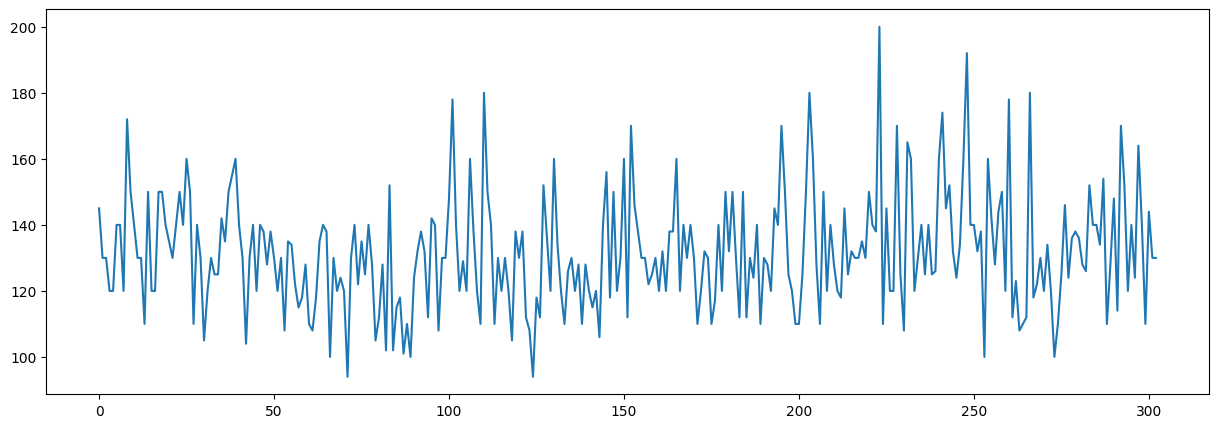

In [20]:
plt.figure(figsize=(15,5))
plt.plot(y['trtbps'])
plt.show()

<Axes: xlabel='output', ylabel='count'>

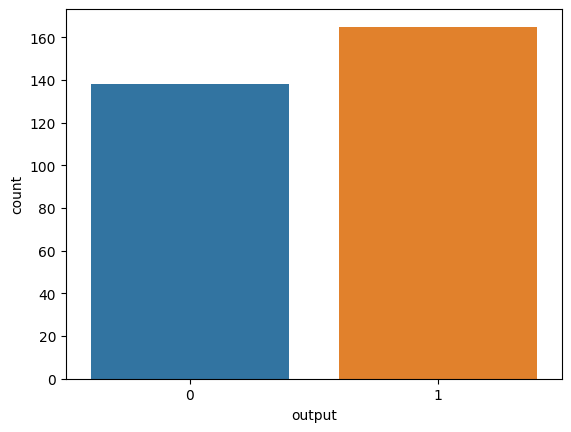

In [21]:
sns.countplot(x='output', data=heart)

<Axes: >

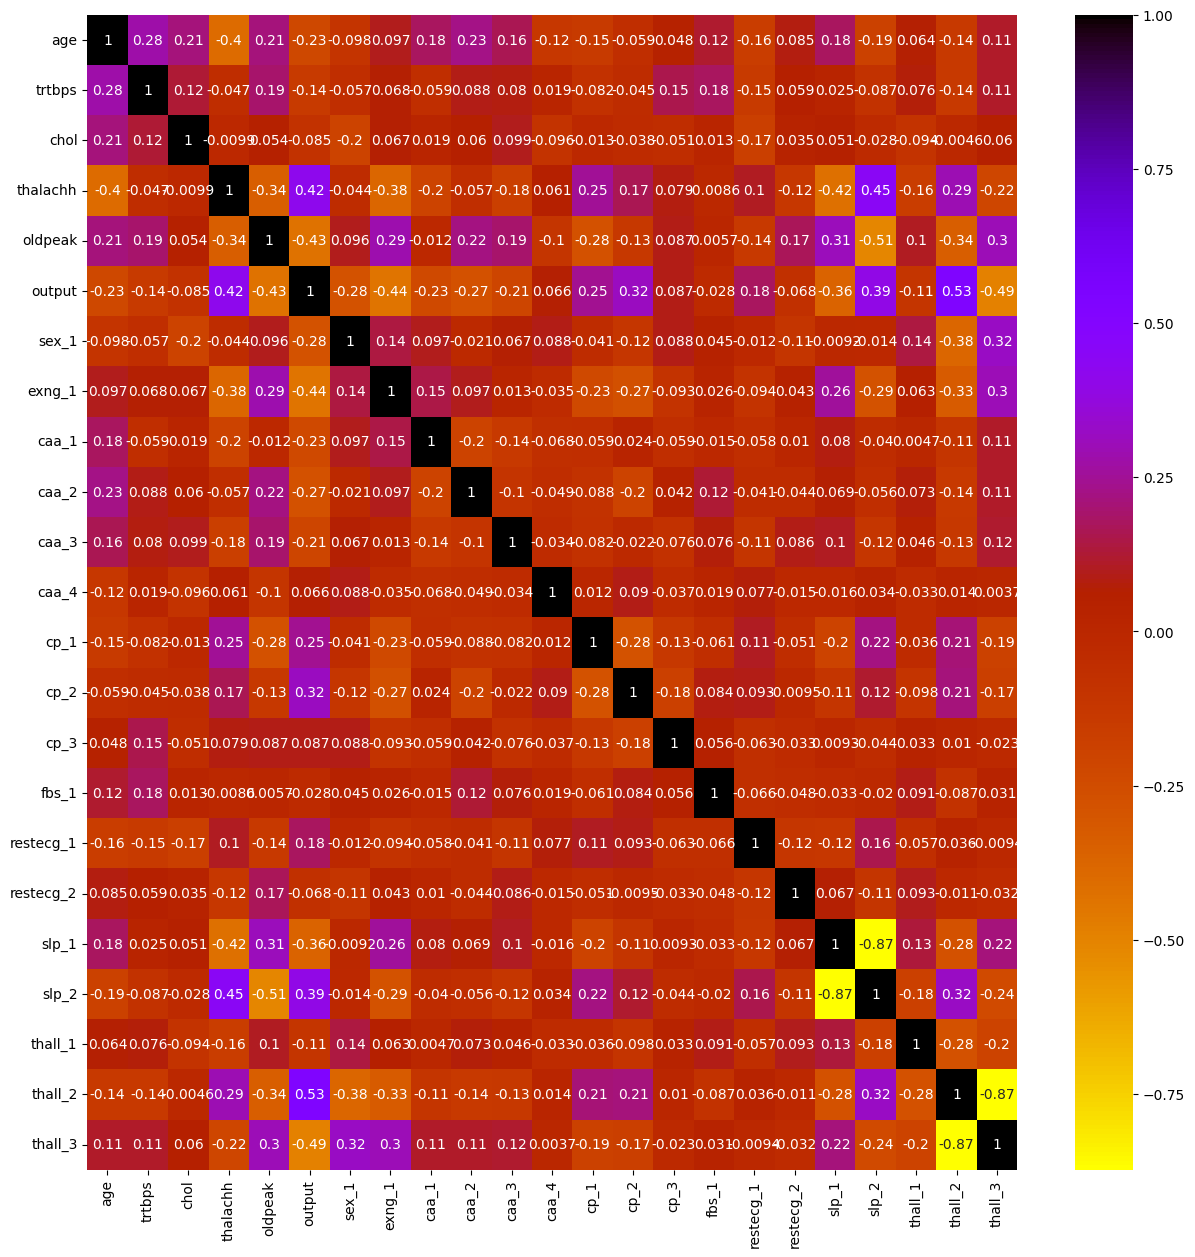

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(heart.corr(), cmap='gnuplot_r', annot=True)

In [23]:

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

raw_data = heart.copy()

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

heart = pd.get_dummies(heart, columns=cat_cols, drop_first=True)
heart.head()

KeyError: "None of [Index(['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall'], dtype='object')] are in the [columns]"

In [24]:
X = heart.drop(['output'], axis=1)
y = heart[['output']]

scaler = RobustScaler()

X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [25]:
X = heart.drop(['output'], axis=1)
y = heart[['output']]

scaler = RobustScaler()

X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)  
y_pred = np.argmax(y_pred_proba, axis=1) 
accuracy_score(y_test, y_pred)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9016393442622951

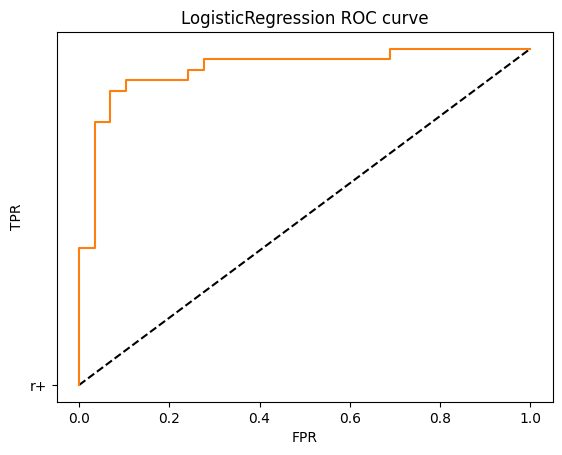

In [28]:
y_pred_prob = y_pred_proba[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LogisticRegression ROC curve')
plt.show()

In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)


gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, subsample=0.8, max_features=0.2, random_state=42)
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)
accuracy_score(y_test, y_pred)


C:\Users\PC\AppData\Local\Temp\ipykernel_5688\847836236.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8688524590163934